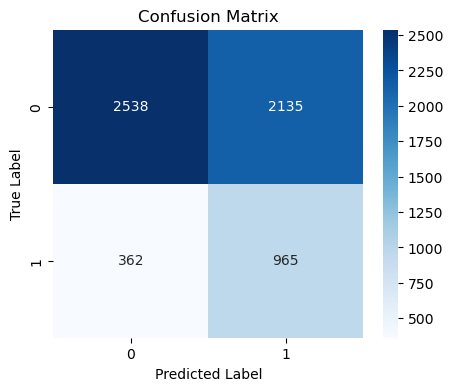

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.54      0.67      4673
           1       0.31      0.73      0.44      1327

    accuracy                           0.58      6000
   macro avg       0.59      0.64      0.55      6000
weighted avg       0.75      0.58      0.62      6000

{'accuracy': 0.5838333333333333, 'auc': 0.7235242912071156, 'precision': 0.31129032258064515, 'recall': 0.7272042200452148, 'f1': 0.43596114750395304, 'mcc': 0.22451147711029285}


In [3]:
# Step 1: Import libraries
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef
)
import matplotlib.pyplot as plt
import seaborn as sns
from modelPY.featuresp import data_process

#This is a static way for feature engineering
df = pd.read_csv("UCI_Credit_Card.csv")

#Making it dynamic, 

X, y, target_column = data_process(df, target_column=None)

def logistic_model(X,y):
    numerical_cols = X.select_dtypes(include=["int64","float64"]).columns #finding numerical data to handle null value
    categorical_cols = X.select_dtypes(include=["object"]).columns #finding categorical data to handle null value
    
    # Train-test split 20% test 80% training and random sample is 50
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40, stratify=y
    )
    # -------------------------------------------------
    # Pipelines
    # -------------------------------------------------
    num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])
    
    cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])
    
    preprocessor = ColumnTransformer([
        ("num", num_pipeline, numerical_cols),
        ("cat", cat_pipeline, categorical_cols)
    ])
    
    # -------------------------------------------------
    # Final Model Pipeline
    # -------------------------------------------------
    model = Pipeline([
        ("prep", preprocessor),
        ("lr", LogisticRegression( max_iter=1000, class_weight="balanced", C=5.0, solver="liblinear"))
        ])
 
    model.fit(X_train, y_train)
    
    #Predictions
    y_prob = model.predict_proba(X_test)[:, 1]
    for t in [0.25, 0.3, 0.35, 0.4, 0.45]:
        y_pred = (y_prob >= t).astype(int)
    #Evaluation Metrics
    baseline_metrics ={
    "accuracy": accuracy_score(y_test, y_pred),
    "auc": float(roc_auc_score(y_test, y_prob)),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred),
    "mcc": float(matthews_corrcoef(y_test, y_pred))
    }

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues"
    )
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    return baseline_metrics, y_test, y_pred 

result, xab, yab = logistic_model(X,y)

print(result)    